# TensorFlow SGD Lab

Welcome to the TensorFlow SGD Lab! By the end of this lab you will have

- Defined and optimized a TensorFlow computational graph to perform classification
- Used TensorBoard summary operations to visualize performance during training
- Used TensorBoard to visualize your computational graph

Let's get started!

---

# Load Data

The following code loads the [Boston housing price regression dataset](http://neupy.com/2015/07/04/boston_house_prices_dataset.html) via [keras](https://keras.io/datasets/) and discretizes the output space into four classes.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from keras.datasets import boston_housing

nb_train = 400
np.random.seed(42)

[X_boston, y_boston], _ = boston_housing.load_data()
X_boston, y_boston = X_boston[:nb_train], y_boston[:nb_train]
sorted_idxs = np.argsort(y_boston)
X_boston, y_boston = X_boston[sorted_idxs], y_boston[sorted_idxs]
y_boston = np.hstack([np.full(shape=100, fill_value=i) for i in range(4)])
idxs = np.arange(nb_train)
np.random.shuffle(idxs)
X_boston, y_boston = X_boston[idxs], y_boston[idxs]

X_boston.shape

Using TensorFlow backend.


(400, 13)

In [3]:
y_boston = y_boston.reshape(-1,1)
y_boston.shape

(400, 1)

In [4]:
from keras.utils import np_utils

In [5]:
y_boston_one_hot = np_utils.to_categorical(y_boston)
y_boston_one_hot

array([[ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.]])

## Task

- Define and optimize a multiclass logistic regression classifier with TensorFlow

## Requirements

- Use TensorBoard to visualize your loss over time as well as your computational graph
- Perform optimization with stochastic gradient descent

## Deliverables

- Take a screenshot of your computational graph and loss in TensorBoard
- Remark on your optimized model on whether it fits the data well (e.g. underfits or overfits)
    - If your final model still does not fit the data well describe what you would try if you had more time and why

## Hints

- Attach a `tf.summary.scalar()` node to your loss node so TensorBoard can log its values over time

In [6]:
 X_ = tf.placeholder(dtype=tf.float64,shape=[None,13])


In [7]:
X_ = tf.placeholder(dtype=tf.float32, shape=[None, 13], name='X')
y_ = tf.placeholder(dtype=tf.float32, shape=[None, 4], name='y')

W = tf.Variable(initial_value=tf.zeros(shape=[13, 4]), name='W')
b = tf.Variable(initial_value=tf.zeros(shape=[4]), name='b')
z = tf.matmul(X_, W, name='z')
c = tf.add(z, b, name='c')
log = 1/(1+tf.exp(-c))

# r = tf.subtract(y_pred, y, name='r')
# losses = tf.square(r, name='losses')    
# loss = tf.reduce_mean(losses, name='loss')

In [8]:
# Construct a linear model
learning_rate=.01

#intermediate y
y_p = tf.nn.softmax(log)

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=log))
cross_entropy_summary = tf.summary.scalar(name='loss_summary',tensor=cross_entropy)


In [9]:
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

In [10]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01, name='Optimizer')

sgd_step = optimizer.minimize(cross_entropy, name='SGDStep')

In [11]:
correct_prediction = tf.equal(tf.argmax(y_p,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy_summary  = tf.summary.scalar(name='accuracy',tensor=accuracy)

In [12]:
loss = []
accuracy_ = []
writer = tf.summary.FileWriter("tensorboard/MLR with softmax Summary", sess.graph)
for i in range(5000):
    c_e_s,c_e,_,acc ,acc_summary= sess.run([cross_entropy_summary, cross_entropy,sgd_step,accuracy ,accuracy_summary], 
                           feed_dict={X_: X_boston, y_: y_boston_one_hot})
    #print(softmax)
    loss.append(c_e)
#     print("Accuracy = {}".format(acc))
    accuracy_.append(acc)
    writer.add_summary(c_e_s, global_step=i)
    writer.add_summary(acc_summary , global_step=i)

writer.flush()

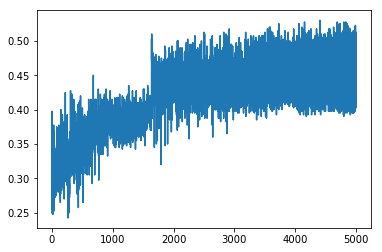

In [13]:
plt.plot(accuracy_)

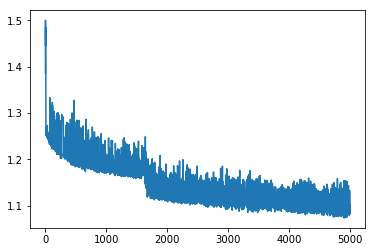

In [14]:
plt.plot(loss)

- Our model does a decent job at fitting the data. With additional layers, we could further increase our accuracy

# Bonus Tasks

- Add hidden layers to your multiclass logistic regression classifier
- Use another optimizer such as adam or adagrad instead of stochastic gradient descent
- Monitor the accuracy

In [15]:
optimizer_2 = tf.train.AdamOptimizer(name='Adam')

sgd_step_2 = optimizer_2.minimize(cross_entropy, name='SGDStep_2')


In [16]:
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

In [26]:
loss_2 = []
acc_2 = []
writer = tf.summary.FileWriter("tensorboard_2/MLR with softmax Summary - Adam", sess.graph)
for i in range(500):
    c_e_s, c_e, _, acc = sess.run([cross_entropy_summary, cross_entropy, sgd_step_2, accuracy], 
                           feed_dict={X_: X_boston, y_: y_boston_one_hot})

    loss_2.append(c_e)
    acc_2.append(acc)

    
    writer.add_summary(c_e_s, global_step=i)

writer.flush()

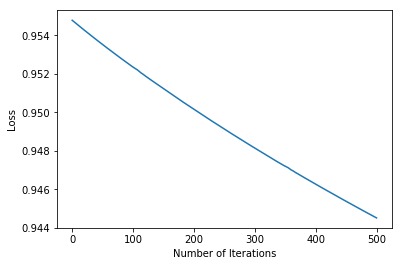

In [27]:
plt.plot(loss_2)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss");

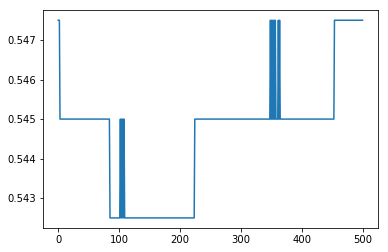

In [28]:
plt.plot(acc_2)